# Sentiment Analysis on IMDB Reviews using RNN

#### [Colah Blog for LSTM](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
#### [Andrej Karpathy's Blog for RNN](https://karpathy.github.io/2015/05/21/rnn-effectiveness/)
#### [LSTM and GRU visualisation](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)

In [1]:
import keras
from keras.datasets import imdb

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.preprocessing import sequence

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

Using Theano backend.


In [2]:
((X_train, y_train), (X_test, y_test)) = imdb.load_data(num_words=10000)

In [3]:
print(len(X_train))
print(len(X_test))

25000
25000


In [4]:
print(X_train[100])
print("Label", y_train[100])

[1, 13, 244, 6, 87, 337, 7, 628, 2219, 5, 28, 285, 15, 240, 93, 23, 288, 549, 18, 1455, 673, 4, 241, 534, 3635, 8448, 20, 38, 54, 13, 258, 46, 44, 14, 13, 1241, 7258, 12, 5, 5, 51, 9, 14, 45, 6, 762, 7, 2, 1309, 328, 5, 428, 2473, 15, 26, 1292, 5, 3939, 6728, 5, 1960, 279, 13, 92, 124, 803, 52, 21, 279, 14, 9, 43, 6, 762, 7, 595, 15, 16, 2, 23, 4, 1071, 467, 4, 403, 7, 628, 2219, 8, 97, 6, 171, 3596, 99, 387, 72, 97, 12, 788, 15, 13, 161, 459, 44, 4, 3939, 1101, 173, 21, 69, 8, 401, 2, 4, 481, 88, 61, 4731, 238, 28, 32, 11, 32, 14, 9, 6, 545, 1332, 766, 5, 203, 73, 28, 43, 77, 317, 11, 4, 2, 953, 270, 17, 6, 3616, 13, 545, 386, 25, 92, 1142, 129, 278, 23, 14, 241, 46, 7, 158]
Label 0


In [5]:
word_2_index = imdb.get_word_index()

In [8]:
# word_2_index

In [9]:
# print(len(word_2_index.items()))

In [10]:
index_2_word = {value:key for (key,value) in word_2_index.items()}

In [12]:
# index_2_word

In [14]:
# list(index_2_word.keys())[0]

In [ ]:
imdb.load_data

In [16]:
' '.join([index_2_word[i] for i in X_train[2000]])

"the as on floor or 5 claims course of here have away then also and think entire love using impression awful another and if an do time time do i i not series when find that is and character that into own have up been that's very older of entire of still i i was had one even eight when her your br when while great than girls minutes as on is whose and on of their it and view if up just is must this obligatory cage just fifteen other focus not imagination makes i i to few some but of time time here br of on and"

In [17]:
X_train = sequence.pad_sequences(X_train, maxlen=300)
X_test = sequence.pad_sequences(X_test, maxlen=300)

In [23]:
model = Sequential()

model.add(Embedding(10000, 100))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                4256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,004,289
Trainable params: 1,004,289
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [25]:
checkpointer = ModelCheckpoint('best_model.h5',
                           monitor='val_loss',
                           verbose=1,
                           save_best_only=True,
                           save_weights_only=False,
                           mode='auto',
                           period=1
                        )
earlystopper = EarlyStopping(monitor='val_acc', patience=1)

In [26]:
hist = model.fit(X_train, y_train,
                 validation_split=0.2,
                 epochs=10,
                 batch_size=128,
                 shuffle=True,
                 verbose=1,
                 callbacks=[checkpointer, earlystopper]
                )

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 30s 2ms/step - loss: 0.5766 - acc: 0.6835 - val_loss: 0.4317 - val_acc: 0.8098

Epoch 00001: val_loss improved from inf to 0.43174, saving model to best_model.h5
Epoch 2/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.3544 - acc: 0.8531 - val_loss: 0.3662 - val_acc: 0.8462

Epoch 00002: val_loss improved from 0.43174 to 0.36621, saving model to best_model.h5
Epoch 3/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.2544 - acc: 0.9026 - val_loss: 0.4691 - val_acc: 0.8242

Epoch 00003: val_loss did not improve from 0.36621


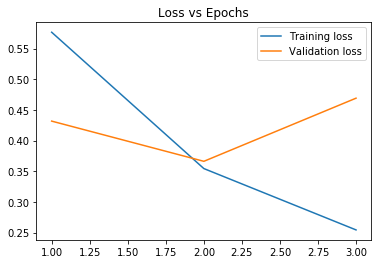

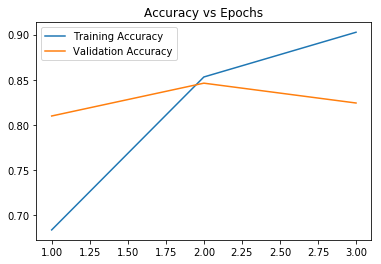

In [27]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,len(loss)+1)
plt.title('Loss vs Epochs')
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.legend()
plt.show()

plt.title('Accuracy vs Epochs')
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# model.save('model.h5')

In [ ]:
#model.load_weights('model_weights.h5')


In [28]:
model.evaluate(X_test, y_test)

25000/25000 [==============================] - 7s 271us/step


[0.4730582687187195, 0.82532]

In [29]:
model.evaluate(X_train, y_train)

25000/25000 [==============================] - 7s 296us/step


[0.32348617349624637, 0.86672]

In [ ]:
# review = """In earnest, I could not be more disappointed with How To Train Your Dragon: The Hidden World. As a (former) fan of the previous two films, I expected a certain level of quality and nuance that the final film seemed to promise. In all facets, it left me disappointed. The story falls flat (with no character whatsoever) and the animation was unimaginative and one dimensionally. The plot unravels in the last 7 minutes and leaves the entire trilogy fatally undermined as a consequence. Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money .
# """
# review = review.lower().replace('.', '').replace(',','').replace('!','').replace(':','').replace('(', ' ').replace(')', ' ').split()
# review = [word_2_index[w] for w in review if word_2_index.get(w) and word_2_index.get(w) < 10000]
# review = sequence.pad_sequences([review], maxlen=500)
# review

In [ ]:
# model.predict(review)